# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

According to the project README file: This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

According to Wikepedia, there are 50 states in the United Sates. https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States

The file contains 53 rows with no missing values. 
50 states + District of Columbia + headers + "all" in the end = 53 rows

So, the dataset seems ok.  Just need to remember that the last row should be ignored as data (but may be used to check that calculated average values are correct).

##### 3. Create a data dictionary for the dataset.

At first I thought that this would be a Python dictionary, because we have not discussed other data dictionaries in lessons.  But this comes before "Step 2: Load the data", so I decided to check if there was a different kind of data dictionaries.

According to Wikepedia, "A data dictionary, or metadata repository, as defined in the IBM Dictionary of Computing, is a centralized repository of information about data such as meaning, relationships to other data, origin, usage, and format." https://en.wikipedia.org/wiki/Data_dictionary

##### Data dictionary

This data was taken from the College Board, and gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.  The last row contains the mean of each column for the entire country.

Each column contains the following information:
- *State*: the state we are considering (two letter abbreviation)
- *Rate*: the rate of participaption for this state
- *Verbal*: the mean verbal score for this state
- *Math*: the mean math score for this state

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [134]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division, print_function, unicode_literals

with open('../assets/sat_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    all_rows = list(reader)

##### 5. Print the data

In [135]:
for row in all_rows:
    print(row)

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', '550']
['WY', '11', '547',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [136]:
headers = all_rows[0]
data = all_rows[1:-1]

print("Headers:", headers)
print("Number of states:", len(data))
print("Data:", data)

Headers: ['State', 'Rate', 'Verbal', 'Math']
Number of states: 51
Data: [['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['I

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [137]:
# I could do this using Pandas, but it's easy to do in Python
state_names = [x[0] for x in data]
print(state_names)

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [138]:
# I will print the type of each element of the first row of the data.
# the other types will be the same.
for elem in data[0]:
    print(type(elem))

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [139]:
# some types need to be reassigned.
# can use int because I saw they were int in the csv.
# also, if any of these were floats, I would get an error
data = [[x[0], int(x[1]), int(x[2]), int(x[3])] for x in data]
print(data)

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [140]:
def create_state_dict_for_column(col_index):
    return {row[0] : row[col_index] for row in data}

# headers: 'State', 'Rate', 'Verbal', 'Math'
state_dict_for_rate = create_state_dict_for_column(1)
state_dict_for_verbal = create_state_dict_for_column(2)
state_dict_for_math = create_state_dict_for_column(3)

def print_dict(dic):
    for key in dic:
        print(key, ":", dic[key])

print("Dictionary for Rate")
print(state_dict_for_rate)
print("Dictionary for Verbal")
print(state_dict_for_verbal)
print("Dictionary for Math")
print(state_dict_for_math)

Dictionary for Rate
{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}
Dictionary for Verbal
{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577

##### 11. Create a dictionary with the values for each of the numeric columns

In [141]:
# I am assuming each value in the dictionary is a list of values
def create_values_dict_for_numeric_columns():
    return {headers[hi] : [d[hi] for d in data] for hi in range(1, len(headers))}

# headers: 'State', 'Rate', 'Verbal', 'Math'
values_dict_for_numeric_columns = create_values_dict_for_numeric_columns()

print("Dictionary of values for numeric columns")
print(values_dict_for_numeric_columns)

Dictionary of values for numeric columns
{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [142]:
def print_min_and_max(dic):
    for key in dic:
        print("Min for", key, ":", min(dic[key]))
        print("Max for", key, ":", max(dic[key]))
        print()
        
print_min_and_max(values_dict_for_numeric_columns)

Min for Rate : 4
Max for Rate : 82

Min for Math : 439
Max for Math : 603

Min for Verbal : 482
Max for Verbal : 593



##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [143]:
# I think that the best solution should have different functions 
# for different measures, because I may need the variance or the mean
# in other parts of the code.
def calc_mean(lst):
    return sum(lst)/len(lst)
    
def calc_variance(lst):
    mean = calc_mean(lst)
    return sum([(x-mean)**2 for x in lst])/len(lst)

def calc_std_dev(lst):
    return calc_variance(lst)**(1/2)

# but it's possible to have one single function that does all the work
def calc_std_dev2(lst):
    mean = sum(lst)/len(lst)
    return (sum([(x-mean)**2 for x in lst])/len(lst))**(1/2)
    

def print_std_dev(dic):
    for key in dic:
        print("Standard deviation for", key, ":", calc_std_dev(dic[key]))

def print_std_dev2(dic):
    for key in dic:
        print("Standard deviation for", key, ":", calc_std_dev2(dic[key]))

print_std_dev(values_dict_for_numeric_columns)
print("================")
print_std_dev2(values_dict_for_numeric_columns)

Standard deviation for Rate : 27.2792386761
Standard deviation for Math : 35.9298731731
Standard deviation for Verbal : 33.0319826842
Standard deviation for Rate : 27.2792386761
Standard deviation for Math : 35.9298731731
Standard deviation for Verbal : 33.0319826842


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

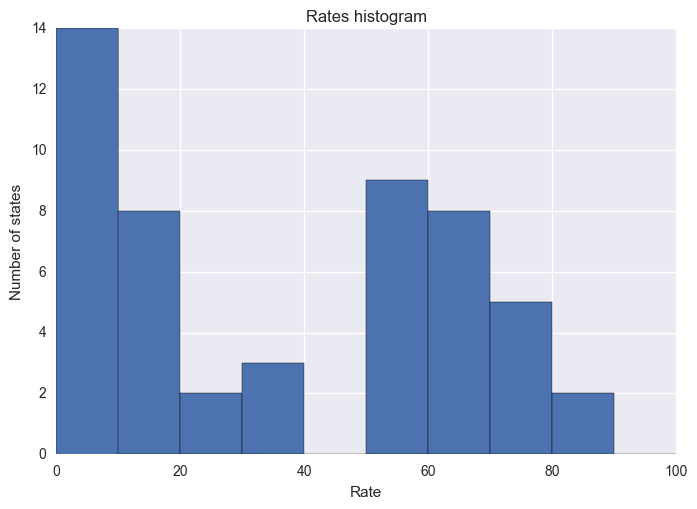

In [144]:
# values_dict_for_numeric_columns has the values

rates = values_dict_for_numeric_columns['Rate']
plt.hist(rates, bins = 10, range = (0, 100))
plt.title("Rates histogram")
plt.xlabel("Rate")
plt.ylabel("Number of states")
plt.show()

##### 15. Plot the Math distribution

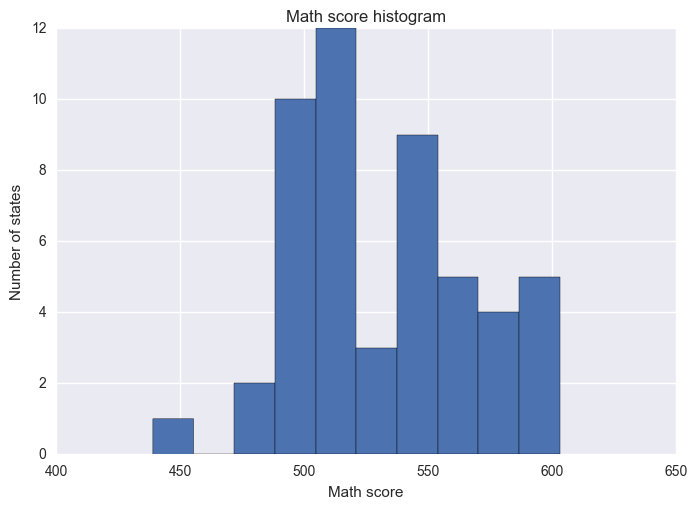

In [145]:
math = values_dict_for_numeric_columns['Math']
plt.hist(math)
plt.title("Math score histogram")
plt.xlabel("Math score")
plt.ylabel("Number of states")
plt.show()

##### 16. Plot the Verbal distribution

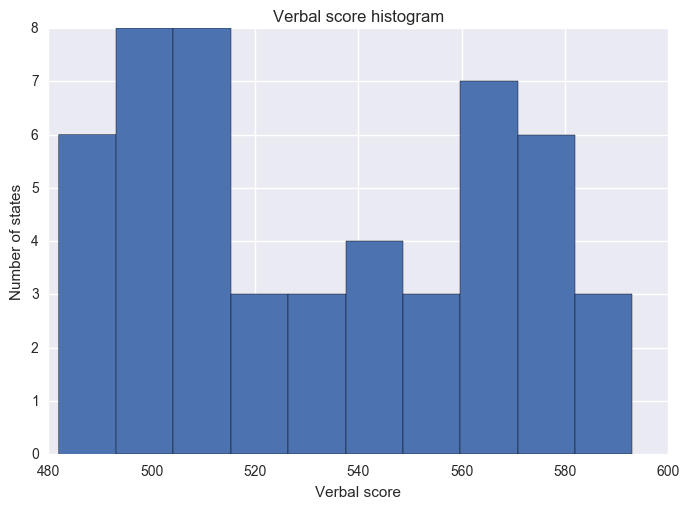

In [146]:
verbal = values_dict_for_numeric_columns['Verbal']
plt.hist(verbal)
plt.title("Verbal score histogram")
plt.xlabel("Verbal score")
plt.ylabel("Number of states")
plt.show()

##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is that it is a normal distribution.

##### 18. Does that distribution hold true for our data?

None of our distributions are normal.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

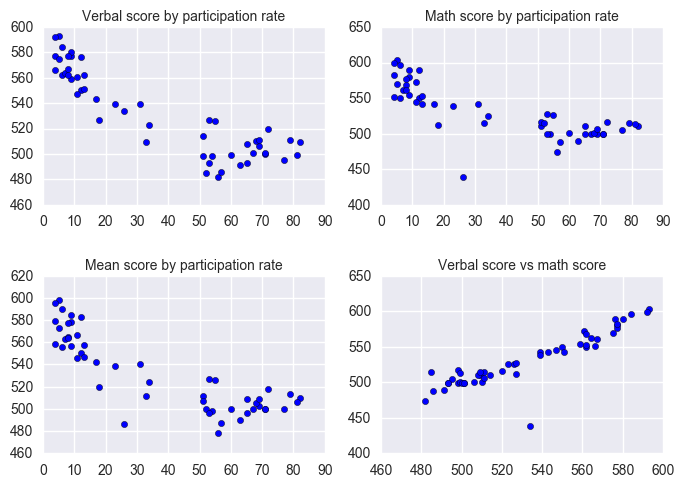

In [147]:
# to draw the scatterplot, I need all lists to be in the same order.
#print(data, "\n")
state_names.sort()
#print(state_names, "\n")
alphabetical_rates = [state_dict_for_rate[s] for s in state_names]
#print(alphabetical_rates)
alphabetical_verbal = [state_dict_for_verbal[s] for s in state_names]
#print(alphabetical_verbal)
alphabetical_math = [state_dict_for_math[s] for s in state_names]
#print(alphabetical_math)
alphabetical_average = [(v+m)/2 for (v, m) in zip(alphabetical_verbal, alphabetical_math)]
#print(alphabetical_average)

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].scatter(alphabetical_rates, alphabetical_verbal)
axes[0,0].set_title("Verbal score by participation rate", fontsize=10)
axes[0,1].scatter(alphabetical_rates, alphabetical_math)
axes[0,1].set_title("Math score by participation rate", fontsize=10)
axes[1,0].scatter(alphabetical_rates, alphabetical_average)
axes[1,0].set_title("Mean score by participation rate", fontsize=10)
axes[1,1].scatter(alphabetical_verbal, alphabetical_math)
axes[1,1].set_title("Verbal score vs math score", fontsize=10)
fig.subplots_adjust(hspace=0.4)
plt.show()

# print([s for s in data if (s[2]>520 and s[3]<450)])

##### 20. Are there any interesting relationships to note?

The two plots in the first row show the mean verbal (left) and math (right) scores as a function of the participation rate.  We can see that the higher the participation rate, the lower the mean scores in each discipline.

The left plot in the second row shows that, as expected, the same is true for the mean of both disciplines.

The last plot shows that in general math and verbal scores for each state are highly correlated (with a single outlier: ['OH', 26, 534, 439]).

##### 21. Create box plots for each variable. 

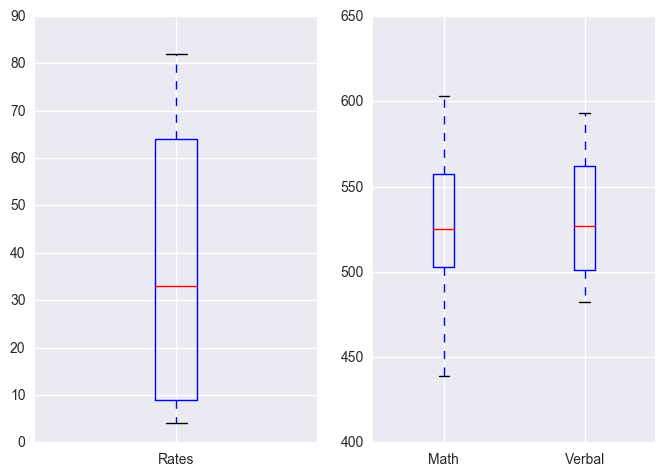

In [148]:
# decided to have two different plots because rates are a percentage 
# and hence have a different scale from sat scores
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].boxplot([rates], labels=["Rates"])
axes[1].boxplot([math, verbal], labels=["Math", "Verbal"])
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 


<img src="verbal-scores.png">

<img src="math-scores.png">

<img src="participation-rate.png">